In [ ]:
# pull data from indiana
# pull shapefile from indiana
# see how to find point in shape file

In [1]:
from CensusData.ACS.fns import *
from CensusData.ACS.utils import *

In [4]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# url = 'https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_18_tract.zip'
# url = 'https://www2.census.gov/geo/tiger/TIGER2018/STATE/tl_2018_us_state.zip'
# local_path = 'tmp/'

# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")

# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
# print(filenames)

# dbf, prj, shp, shx = [filename for filename in filenames]
# state = gpd.read_file(local_path + shp)


Done


Text(0.5, 1.0, ' Tracts. Default view')

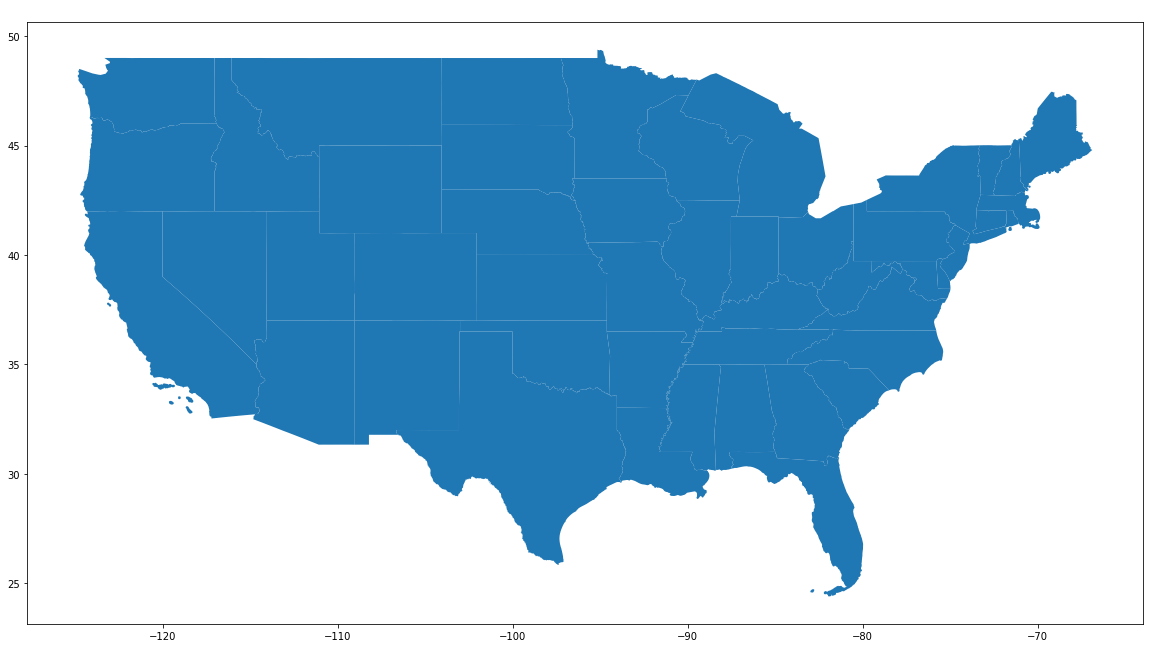

In [87]:
state = gpd.read_file('/Users/vinniepalazeti/Desktop/github/GPS/examples/Notebooks/tmp/tl_2018_us_state.shp')
state= state[~state['STUSPS'].isin(['AK','HI','VI','MP','GU','AS','PR'])]
ax = state.plot(figsize=(20,20))
ax.set_title(" Tracts. Default view", color = 'white')

In [54]:
from shapely.geometry import Point, Polygon, mapping, MultiPoint

p = Point(-98.27,28.29)
p_buff = p.buffer(.1)

state_ = state.explode().reset_index(drop=True)

point_frame = gpd.GeoDataFrame(pd.DataFrame({
    'input' : ['point'],
    'geometry' : p_buff
    
    
}))
                 
point_frame.set_crs(epsg=4269, inplace=True)

gpd.sjoin(state_,point_frame, how="inner", op='intersects')


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index_right,input
33,3,7,48,01779801,48,TX,Texas,00,G4000,A,676653171537,19006305260,+31.4347032,-099.2818238,"POLYGON ((-103.98018 32.00012, -103.97994 32.0...",0,point


In [85]:
# note I not only want those that intersect with my point, I also want those that are contained within whatever I return


state_f = gpd.read_file('/Users/vinniepalazeti/Desktop/github/GPS/examples/Notebooks/tmp/tl_2018_48_tract.shp')
state_f_explode = state_f.explode().reset_index(drop=True)

temp = gpd.sjoin(state_f_explode,point_frame, how="inner", op='intersects')

# temp['color'] = ['#C62828', '#C62828','#C62828', '#283593']
# temp.plot(color=temp['color'],figsize = (20,20)) ;
temp.drop(columns=['index_right'],inplace=True)
# gpd.sjoin(temp,state_f_explode,how='inner',op='contains')

#gpd.sjoin(temp,state_f_explode[~state_f_explode.index.isin(temp.index)],op='contains')

,STATEFP_left,COUNTYFP_left,TRACTCE_left,GEOID_left,NAME_left,NAMELSAD_left,MTFCC_left,FUNCSTAT_left,ALAND_left,AWATER_left,...,TRACTCE_right,GEOID_right,NAME_right,NAMELSAD_right,MTFCC_right,FUNCSTAT_right,ALAND_right,AWATER_right,INTPTLAT_right,INTPTLON_right


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,439,113809,48439113809,1138.09,Census Tract 1138.09,G5020,S,2486175,0,+32.8655141,-097.2526871,"POLYGON ((-97.26461 32.86064, -97.26460 32.860..."
1,48,167,721201,48167721201,7212.01,Census Tract 7212.01,G5020,S,15449380,263197,+29.5153009,-095.0499846,"POLYGON ((-95.08262 29.50014, -95.08234 29.500..."
2,48,167,722001,48167722001,7220.01,Census Tract 7220.01,G5020,S,8426698,289777,+29.4183084,-094.9251834,"POLYGON ((-94.93725 29.42071, -94.93699 29.421..."
3,48,167,726200,48167726200,7262,Census Tract 7262,G5020,S,36250325,4879318,+29.3584093,-094.9155031,"POLYGON ((-94.96951 29.37901, -94.96753 29.379..."
4,48,439,121609,48439121609,1216.09,Census Tract 1216.09,G5020,S,4036422,2474977,+32.6893777,-097.2140987,"POLYGON ((-97.23369 32.67175, -97.23366 32.671..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,48,061,011903,48061011903,119.03,Census Tract 119.03,G5020,S,60563147,1375049,+26.0878356,-097.8251341,"POLYGON ((-97.86217 26.06111, -97.86176 26.062..."
5261,48,061,014002,48061014002,140.02,Census Tract 140.02,G5020,S,679785,0,+25.9060206,-097.5053924,"POLYGON ((-97.51102 25.90552, -97.51099 25.905..."
5262,48,061,011400,48061011400,114,Census Tract 114,G5020,S,52581773,1717407,+26.1453025,-097.5914106,"POLYGON ((-97.65860 26.17108, -97.65712 26.172..."
5263,48,061,012401,48061012401,124.01,Census Tract 124.01,G5020,S,50339606,1317358,+26.0594664,-097.5139010,"POLYGON ((-97.57663 26.07616, -97.57644 26.076..."


In [53]:

### download shape files stop fucking with this requests thing it's silly


## OK now I have a locally run finder, which is much faster than I thought it would be. nice

## Now how can I save this

## process would be
# >> Get GPS point
# >> read in US shape file, 
# >> get state where located
# >> read in that state file
# >> get census tract or block where located

#### ALTERNATIVELY ####
# could get a point, make a circle radius around the point & then sjoin? returning all of the shapes that intersect
# create the circle & use intersect

## could add the point to the df
## 

# be able to save US shape file to SQL server

# p = Point(-98.27,28.29)
# p_buff = p.buffer(.1)

# state_ = state.explode().reset_index(drop=True)

# for i in range(state_.shape[0]):
#     poly = Polygon(state_.iloc[i]['geometry'])
    
#     if poly.contains(p):
#         print(state_.iloc[i])
        
#         state_f = gpd.read_file('/Users/vinniepalazeti/Desktop/github/GPS/examples/Notebooks/tmp/tl_2018_48_tract.shp')
#         state_f_explode = state_f.explode().reset_index(drop=True)
        
#         for j in range(state_f_explode.shape[0]):
#             poly_ = Polygon(state_f_explode.iloc[j]['geometry'])
            
#             if poly_.intersects(p_buff):
#                 print(state_f_explode.iloc[j])


REGION                                                      3
DIVISION                                                    7
STATEFP                                                    48
STATENS                                              01779801
GEOID                                                      48
STUSPS                                                     TX
NAME                                                    Texas
LSAD                                                       00
MTFCC                                                   G4000
FUNCSTAT                                                    A
ALAND                                            676653171537
AWATER                                            19006305260
INTPTLAT                                          +31.4347032
INTPTLON                                         -099.2818238
geometry    POLYGON ((-103.980179 32.000125, -103.979937 3...
Name: 33, dtype: object
STATEFP                                       

In [12]:
# for i in range(state_.shape[0]):
#     poly = Polygon(state_.iloc[i]['geometry'])
#     if poly.contains(p):
#         print(state_.iloc[i])
        
#         state_f = gpd.read_file('/Users/vinniepalazeti/Desktop/github/GPS/examples/Notebooks/tmp/tl_2018_48_tract.shp')
        
#         state_f_explode = state_f.explode().reset_index(drop=True)
#         for j in range(state_f_explode.shape[0]):
#             poly_ = Polygon(state_f_explode.iloc[j]['geometry'])
#             if poly_.contains(p):
#                 print(state_f_explode.iloc[j])

POLYGON ((-79.59999999999999 34.074, -79.69630546655605 32.11365719340879, -79.98429439193538 30.17219355967744, -80.46119328535582 28.26830645491076, -81.12240934977426 26.42033135269821, -81.96157471303289 24.64606526348005, -82.97060775394908 22.96259533960797, -84.13979093274524 21.3861343167271, -85.45786437626903 19.93186437626906, -86.91213431672708 18.61379093274527, -88.48859533960793 17.4446077539491, -90.17206526348002 16.43557471303291, -91.94633135269818 15.59640934977427, -93.79430645491072 14.93519328535583, -95.69819355967741 14.45829439193539, -97.63965719340875 14.17030546655607, -99.59999999999997 14.074, -101.5603428065912 14.17030546655606, -103.5018064403225 14.45829439193538, -105.4056935450892 14.93519328535581, -107.2536686473018 15.59640934977425, -109.0279347365199 16.43557471303288, -110.711404660392 17.44460775394907, -112.2878656832729 18.61379093274523, -113.7421356237309 19.93186437626902, -115.0602090672547 21.38613431672706, -116.2293922460509 22.96259

In [27]:
# texas = state_[state_['NAME'] == 'Texas']
# texas.loc[len(texas)+1,'geometry'] = p
# texas.loc[len(texas)+1,'geometry'] = p_buff
# texas['color'] = ['#C62828', '#283593', '#283593']
# texas.plot(color=texas['color'],figsize = (20,20)) ;

In [40]:
from ast import literal_eval
from pandas.io.json import json_normalize


In [47]:
import sqlite3
con = sqlite3.connect('/Users/vinniepalazeti/Desktop/github/GPS/db/GPS.db')

#temp = pd.read_sql('select * from tl_2018_48_tract', con)

cur = con.cursor()


rows = cur.fetchall()


In [55]:
literal_eval([i for i in cur.execute("SELECT * FROM tl_2018_48_tract")][0][1])

{'type': 'Polygon',
 'coordinates': [[[-97.264609, 32.860635],
   [-97.26459799999999, 32.8607],
   [-97.264589, 32.860755999999995],
   [-97.26454299999999, 32.861053],
   [-97.26406399999999, 32.863909],
   [-97.263933, 32.864784],
   [-97.263548, 32.867154],
   [-97.263486, 32.867537999999996],
   [-97.263441, 32.86782],
   [-97.263412, 32.867993],
   [-97.263408, 32.868021],
   [-97.263385, 32.86817],
   [-97.263382, 32.868187999999996],
   [-97.26327599999999, 32.868831],
   [-97.26322599999999, 32.869142],
   [-97.263127, 32.869751],
   [-97.262981, 32.870650999999995],
   [-97.26283099999999, 32.871625],
   [-97.26241499999999, 32.874072999999996],
   [-97.26227899999999, 32.874072],
   [-97.262226, 32.874072999999996],
   [-97.262063, 32.874172],
   [-97.258814, 32.874161],
   [-97.25829, 32.874156],
   [-97.25759699999999, 32.874151999999995],
   [-97.25679699999999, 32.874145999999996],
   [-97.255718, 32.874133],
   [-97.25541799999999, 32.874134999999995],
   [-97.255004, 3

In [45]:
#pd.read_json(temp['geometry'])
# temp['geometry'].to_json()

# point_frame = gpd.GeoDataFrame(pd.DataFrame({
#     'input' : ['point'],
#     'geometry' : p_buff
    
    
# }))
#ast?
#df['the_column']=df['the_column'].apply(ast.literal_eval)

# l1 = df1['attributes'].values
# data = map(lambda x: json.loads(x), l1)
# df2 = pd.DataFrame(data)

# temp['geometry'].apply()

#temp['geometry'].apply(literal_eval).astype(int)

In [44]:
# temp['geometry'].apply(literal_eval).tolist()